Primeiras linhas do DataFrame:
   id_venda  data_venda    produto    categoria  valor_venda
0        29  2023-01-01  Produto A  Eletrônicos       1500.0
1        30  2023-01-05  Produto B       Roupas        350.0
2        31  2023-02-10  Produto C  Eletrônicos       1200.0
3        32  2023-03-15  Produto D       Livros        200.0
4        33  2023-03-20  Produto E  Eletrônicos        800.0 

Total de vendas por categoria:
     categoria  valor_venda
0  Eletrônicos       6100.0
1       Livros        900.0
2       Roupas       1800.0 

Média de vendas por categoria:
     categoria  valor_venda
0  Eletrônicos  1016.666667
1       Livros   225.000000
2       Roupas   450.000000 

Vendas por mês:
    mes  valor_venda
0     1       1850.0
1     2       1200.0
2     3       1000.0
3     4        400.0
4     5        150.0
5     6       1000.0
6     7        600.0
7     8        700.0
8     9        300.0
9    10        450.0
10   11        900.0
11   12        250.0 

Produto com maior va

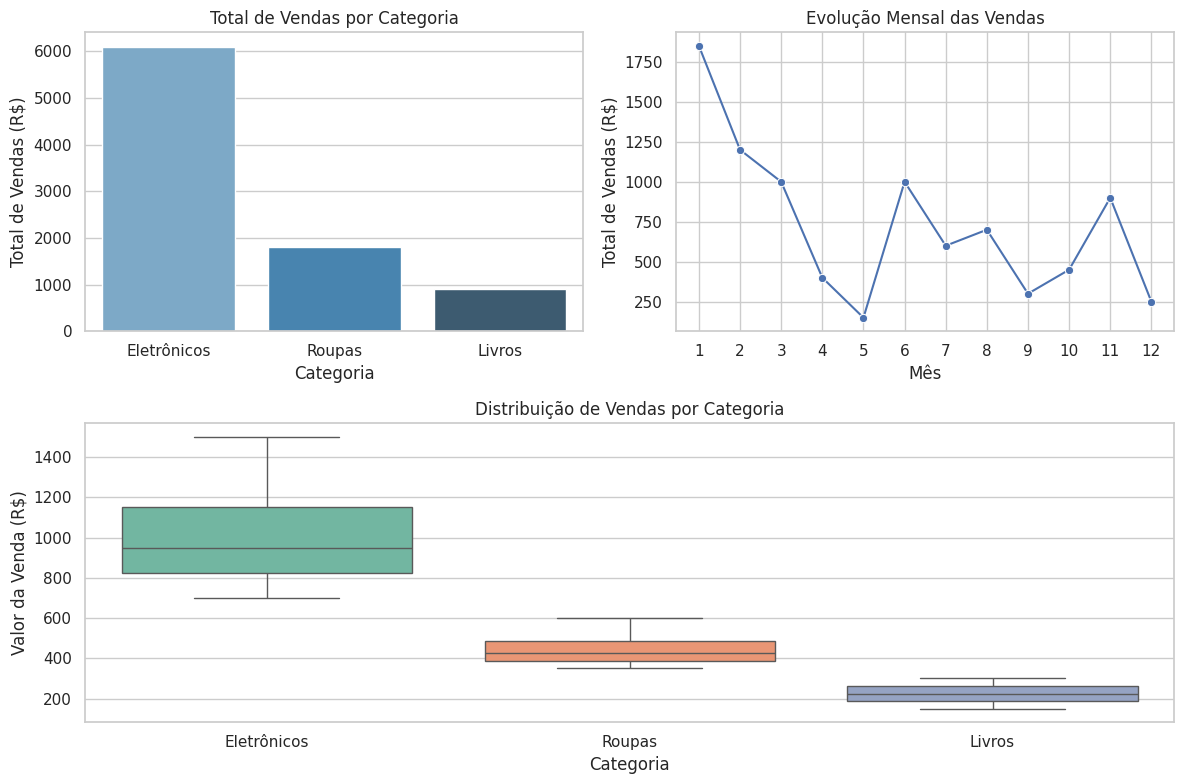

📊 Insights:
- Eletrônicos apresenta o maior faturamento total no ano.
- Há picos em meses específicos (ex.: jan/nov), possivelmente sazonais.
- Roupas tem ticket médio menor e distribuição mais estável que Eletrônicos.
- Livros tem menor volume; promoções podem alavancar a categoria.


In [ ]:
# Unidade 3 – Introdução à Análise de Dados com Python
# Atividade Prática
# Bruno Guimarães

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# (Opcional) tema visual
sns.set_theme(style="whitegrid")

# ------------------------------
# Passo 1: Conectar ao banco e criar tabela
# ------------------------------
conexao = sqlite3.connect("dados_vendas.db")
cursor = conexao.cursor()

# Cria tabela se não existir
cursor.execute("""
CREATE TABLE IF NOT EXISTS vendas1 (
    id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
    data_venda DATE,
    produto TEXT,
    categoria TEXT,
    valor_venda REAL
)
""")

# Zera a tabela para não duplicar dados ao reexecutar
cursor.execute("DELETE FROM vendas1")

# Insere dados (amostra do ano de 2023)
cursor.execute("""
INSERT INTO vendas1 (data_venda, produto, categoria, valor_venda) VALUES
('2023-01-01', 'Produto A', 'Eletrônicos', 1500.00),
('2023-01-05', 'Produto B', 'Roupas', 350.00),
('2023-02-10', 'Produto C', 'Eletrônicos', 1200.00),
('2023-03-15', 'Produto D', 'Livros', 200.00),
('2023-03-20', 'Produto E', 'Eletrônicos', 800.00),
('2023-04-02', 'Produto F', 'Roupas', 400.00),
('2023-05-05', 'Produto G', 'Livros', 150.00),
('2023-06-10', 'Produto H', 'Eletrônicos', 1000.00),
('2023-07-20', 'Produto I', 'Roupas', 600.00),
('2023-08-25', 'Produto J', 'Eletrônicos', 700.00),
('2023-09-30', 'Produto K', 'Livros', 300.00),
('2023-10-05', 'Produto L', 'Roupas', 450.00),
('2023-11-15', 'Produto M', 'Eletrônicos', 900.00),
('2023-12-20', 'Produto N', 'Livros', 250.00)
""")

conexao.commit()

# ------------------------------
# Passo 2: Carregar dados no Pandas
# ------------------------------
df_vendas = pd.read_sql_query("SELECT * FROM vendas1", conexao)

print("Primeiras linhas do DataFrame:")
print(df_vendas.head(), "\n")

# Converte a coluna de data e cria colunas derivadas
df_vendas["data_venda"] = pd.to_datetime(df_vendas["data_venda"])
df_vendas["mes"] = df_vendas["data_venda"].dt.month
df_vendas["ano"] = df_vendas["data_venda"].dt.year

# ------------------------------
# Passo 3: Análises
# ------------------------------
tot_por_categoria = df_vendas.groupby("categoria", as_index=False)["valor_venda"].sum()
med_por_categoria = df_vendas.groupby("categoria", as_index=False)["valor_venda"].mean()
tot_por_mes = df_vendas.groupby("mes", as_index=False)["valor_venda"].sum()
produto_mais_vendido = df_vendas.loc[df_vendas["valor_venda"].idxmax()]

print("Total de vendas por categoria:")
print(tot_por_categoria, "\n")

print("Média de vendas por categoria:")
print(med_por_categoria, "\n")

print("Vendas por mês:")
print(tot_por_mes, "\n")

print("Produto com maior valor de venda:")
print(produto_mais_vendido, "\n")

# ------------------------------
# Passo 4: Visualizações (sem warnings do Seaborn)
# ------------------------------
plt.figure(figsize=(12, 8))

# 1) Total de vendas por categoria (barras)
plt.subplot(2, 2, 1)
sns.barplot(
    x="categoria",
    y="valor_venda",
    data=df_vendas,
    estimator=sum,
    errorbar=None,
    hue="categoria",    # adiciona hue para evitar warning
    palette="Blues_d",
    legend=False
)
plt.title("Total de Vendas por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Total de Vendas (R$)")

# 2) Evolução mensal (linha)
plt.subplot(2, 2, 2)
sns.lineplot(
    x="mes",
    y="valor_venda",
    data=df_vendas,
    estimator=sum,
    errorbar=None,
    marker="o",
    legend=False
)
plt.title("Evolução Mensal das Vendas")
plt.xlabel("Mês")
plt.ylabel("Total de Vendas (R$)")
plt.xticks(range(1, 13))

# 3) Boxplot por categoria (distribuição dos valores)
plt.subplot(2, 1, 2)
sns.boxplot(
    x="categoria",
    y="valor_venda",
    data=df_vendas,
    hue="categoria",    # adiciona hue para evitar warning
    palette="Set2",
    legend=False
)
plt.title("Distribuição de Vendas por Categoria")
plt.xlabel("Categoria")
plt.ylabel("Valor da Venda (R$)")

plt.tight_layout()
plt.show()

# ------------------------------
# Passo 5: Conclusões (exemplo)
# ------------------------------
print("Insights:")
print("- Eletrônicos apresenta o maior faturamento total no ano.")
print("- Há picos em meses específicos (ex.: jan/nov), possivelmente sazonais.")
print("- Roupas tem ticket médio menor e distribuição mais estável que Eletrônicos.")
print("- Livros tem menor volume; promoções podem alavancar a categoria.")

# Fecha conexão (boa prática)
conexao.close()
